# Ejercicio

Una bibliotecaria en la Universidad de Florida quiso estimar varias caracteristicas de los libros en una de las colecciones especiales de la universidad. Entre las preguntas de interes fueron "¿Que tan antiguo es un libro tipico en la coleccion?" y "¿Cuanto ha pasado desde que un libro tipico ha sido consultado?". Ella sospechi que la distribuciones de estas variables son fuertemente sesgadas a la derecha, asi que escogio la mediana para describir el centro. En el archivo biblio.csv se tienen observaiones de P = nro. de años desde publicacion y C = numero de años desde que fue consultado el libro. Para una muestra aleatoria simple de 54 libros de la coleccion. 

### Datos 

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from scipy.stats import bootstrap

In [3]:
df = pd.read_csv('./biblio.csv')
df.head()

,C,P
0,1,3
1,9,9
2,4,4
3,1,18
4,1,5


In [10]:
df.describe()

,C,P
count,53.000000,53.000000
mean,9.603774,21.981132
std,15.362717,25.793179
min,0.000000,3.000000
25%,1.000000,9.000000
50%,4.000000,17.000000
75%,10.000000,19.000000
max,72.000000,140.000000


### A) Construye un boxplot de los valores P y comenta que observas

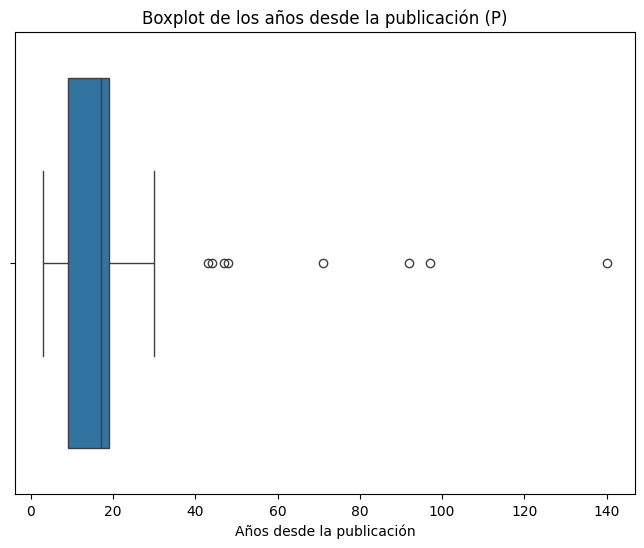

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["P"])
plt.title("Boxplot de los años desde la publicación (P)")
plt.xlabel("Años desde la publicación")
plt.show()

Podemos ver que esta sesgado a la izquierda y que existen muchos valores atipicos(Que afectan mucho al rango y escala de nuestra grafica)

### B) Utiliza bootstrap para estimar la desviacion estándar de la mediana muestral asi como para construir un intervalo de la confianza para construir un intervalo de confianza para la mediana poblacional 

Intervalo de confianza del 95% para la mediana poblacional: (11.00, 19.00)


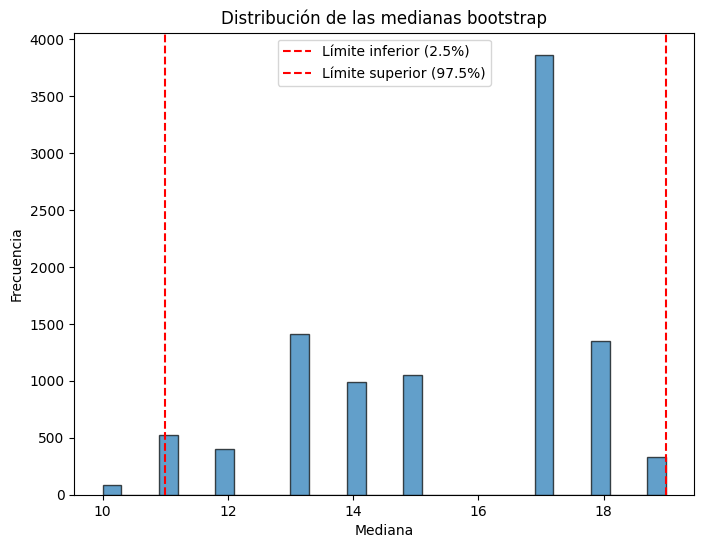

In [ ]:
bootstrap_ci = bootstrap((df["P"],), np.median, confidence_level=0.95, random_state=1, method='percentile')
print(f"Intervalo de confianza del 95% para la mediana poblacional: ({bootstrap_ci.confidence_interval.low:.2f}, {bootstrap_ci.confidence_interval.high:.2f})")
n_iteraciones = 10000
medianas = [np.median(np.random.choice(df["P"], size=len(df["P"]), replace=True)) for _ in range(n_iteraciones)]
plt.figure(figsize=(8, 6))
plt.hist(medianas, bins=30, edgecolor="black", alpha=0.7)
plt.axvline(bootstrap_ci.confidence_interval.low, color="red", linestyle="--", label="Límite inferior (2.5%)")
plt.axvline(bootstrap_ci.confidence_interval.high, color="red", linestyle="--", label="Límite superior (97.5%)")
plt.title("Distribución de las medianas bootstrap")
plt.xlabel("Mediana")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

### C) Construye un intervalo de confianza para la desviacion estandar poblacional del numero de años desde la publicacion del libro 

Intervalo de confianza del 95% para la desviación estándar poblacional: (13.04, 35.63)


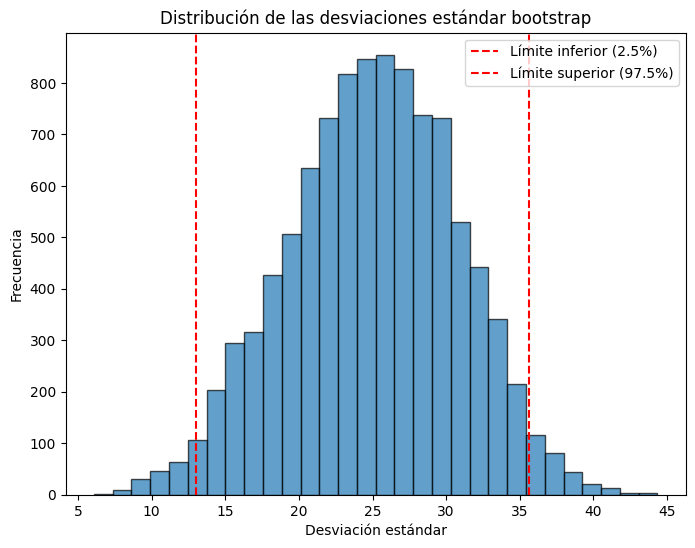

In [17]:
bootstrap_ci = bootstrap((df["P"],), np.std, confidence_level=0.95, random_state=1, method='percentile')
print(f"Intervalo de confianza del 95% para la desviación estándar poblacional: ({bootstrap_ci.confidence_interval.low:.2f}, {bootstrap_ci.confidence_interval.high:.2f})")

std_devs = [np.std(np.random.choice(df["P"], size=len(df["P"]), replace=True), ddof=1) for _ in range(n_iteraciones)]

# Histograma 
plt.figure(figsize=(8, 6))
plt.hist(std_devs, bins=30, edgecolor="black", alpha=0.7)
plt.axvline(bootstrap_ci.confidence_interval.low, color="red", linestyle="--", label="Límite inferior (2.5%)")
plt.axvline(bootstrap_ci.confidence_interval.high, color="red", linestyle="--", label="Límite superior (97.5%)")
plt.title("Distribución de las desviaciones estándar bootstrap")
plt.xlabel("Desviación estándar")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

### D) Finalmente utiliza Bootstrap para crear un histograma de la distribucion de la correlacion muestral

Intervalo de confianza del 95% para la correlación poblacional: (-0.1947, 0.3448)


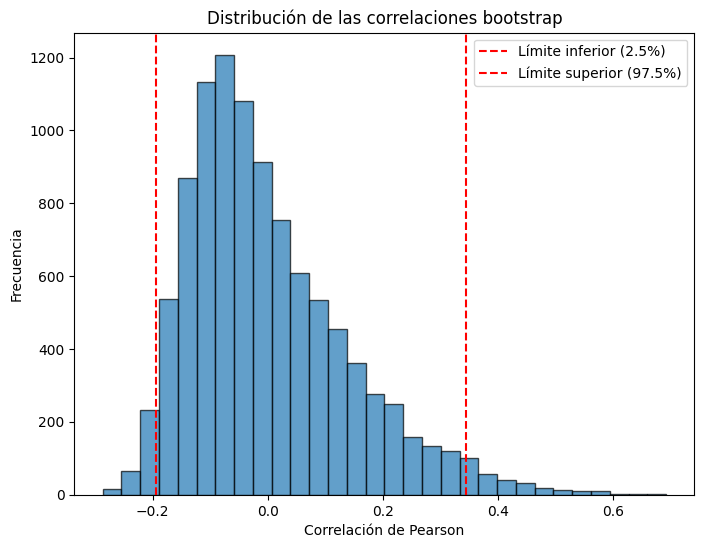

In [ ]:
def calcular_correlacion(p, c):
    return np.corrcoef(p, c)[0, 1]


bootstrap_ci = bootstrap((df["P"], df["C"]), calcular_correlacion, confidence_level=0.95, random_state=23, method='percentile')


print(f"Intervalo de confianza del 95% para la correlación poblacional: ({bootstrap_ci.confidence_interval.low:.4f}, {bootstrap_ci.confidence_interval.high:.4f})")

n_iteraciones = 10000
correlaciones = [calcular_correlacion(np.random.choice(df["P"], size=len(df["P"]), replace=True),
                                np.random.choice(df["C"], size=len(df["C"]), replace=True)) for _ in range(n_iteraciones)]

# Histograma de las correlaciones bootstrap
plt.figure(figsize=(8, 6))
plt.hist(correlaciones, bins=30, edgecolor="black", alpha=0.7)
plt.axvline(bootstrap_ci.confidence_interval.low, color="red", linestyle="--", label="Límite inferior (2.5%)")
plt.axvline(bootstrap_ci.confidence_interval.high, color="red", linestyle="--", label="Límite superior (97.5%)")
plt.title("Distribución de las correlaciones bootstrap")
plt.xlabel("Correlación de Pearson")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()